### Market Cap Weight

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

market_weight = pd.read_excel(
    '../data/sp100_stocks_weights.xlsx',
    index_col = 0
)

In [92]:
market_weight

,AAPL-US,ABBV-US,ABT-US,ACN-US,ADBE-US,AIG-US,AMD-US,AMGN-US,AMT-US,AMZN-US,...,UBER-US,UNH-US,UNP-US,UPS-US,USB-US,V-US,VZ-US,WFC-US,WMT-US,XOM-US
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-31,0.001228,0.000000,0.014136,0.001614,0.001448,0.033503,0.000427,0.015558,0.000223,0.002012,...,0.000000,0.006348,0.003436,0.006731,0.009587,0.000000,0.024932,0.019010,0.050046,0.054506
2003-02-03,0.001243,0.000000,0.013934,0.001576,0.001470,0.033957,0.000408,0.015778,0.000215,0.002023,...,0.000000,0.006158,0.003380,0.006993,0.009523,0.000000,0.025007,0.018994,0.049895,0.054796
2003-02-04,0.001257,0.000000,0.013893,0.001606,0.001459,0.032232,0.000415,0.015935,0.000217,0.002045,...,0.000000,0.006131,0.003419,0.007027,0.009609,0.000000,0.025351,0.019008,0.049716,0.055665
2003-02-05,0.001252,0.000000,0.013857,0.001619,0.001473,0.031874,0.000415,0.015858,0.000213,0.002069,...,0.000000,0.006141,0.003424,0.007086,0.009437,0.000000,0.025405,0.018427,0.049581,0.055192
2003-02-06,0.001257,0.000000,0.013942,0.001589,0.001481,0.030400,0.000421,0.015953,0.000214,0.002073,...,0.000000,0.006182,0.003457,0.007082,0.009485,0.000000,0.025229,0.018751,0.049911,0.054655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-17,0.082538,0.009078,0.005434,0.003497,0.003574,0.000990,0.006011,0.003442,0.002149,0.057486,...,0.004511,0.007200,0.002997,0.001660,0.001797,0.015522,0.004338,0.006149,0.019347,0.011438
2025-09-18,0.081902,0.009098,0.005434,0.003462,0.003616,0.001003,0.005946,0.003445,0.002097,0.057213,...,0.004582,0.007035,0.003032,0.001672,0.001813,0.015116,0.004272,0.006206,0.019163,0.011269
2025-09-19,0.083910,0.009051,0.005453,0.003439,0.003575,0.000982,0.005883,0.003539,0.002085,0.056858,...,0.004731,0.007023,0.003013,0.001641,0.001807,0.015158,0.004222,0.006245,0.018790,0.011078


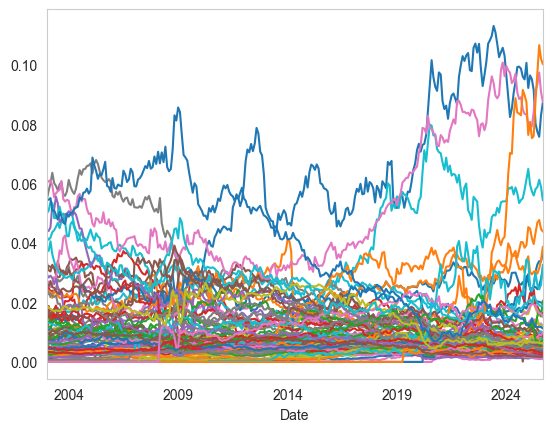

In [21]:
market_weight.resample('ME').last().plot(legend = False)
plt.grid(False)
plt.show()

### forward PER Weight

In [63]:
fper_weight = pd.read_excel(
    '../data/sp100_stocks_weights.xlsx',
    index_col = 0,
    sheet_name = 'fPER'
)

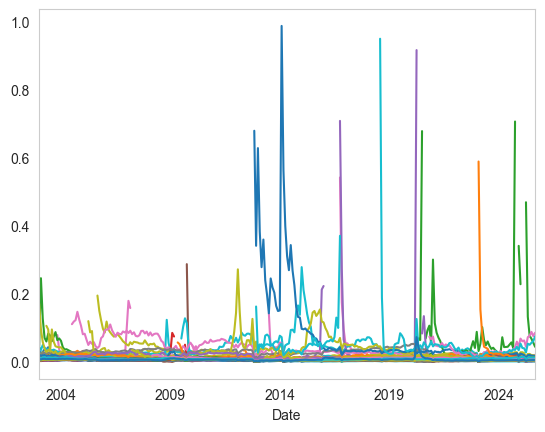

In [24]:
fper_weight.resample('ME').last().plot(legend = None)
plt.grid(False)
plt.show()

### BPR Weight

In [25]:
bpr_weight = pd.read_excel(
    '../data/sp100_stocks_weights.xlsx',
    index_col = 0,
    sheet_name = 'BPR'
)

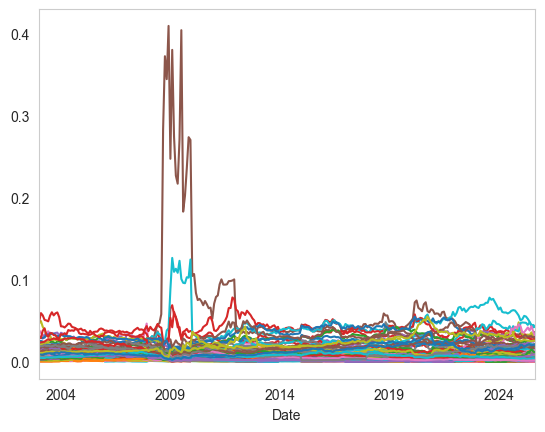

In [27]:
bpr_weight.resample('ME').last().plot(legend = False)
plt.grid(False)
plt.show()

## Allocation

In [64]:
price = pd.read_excel(
    '../data/sp100_stocks_weights.xlsx',
    index_col = 0,
    sheet_name = 'price'
)

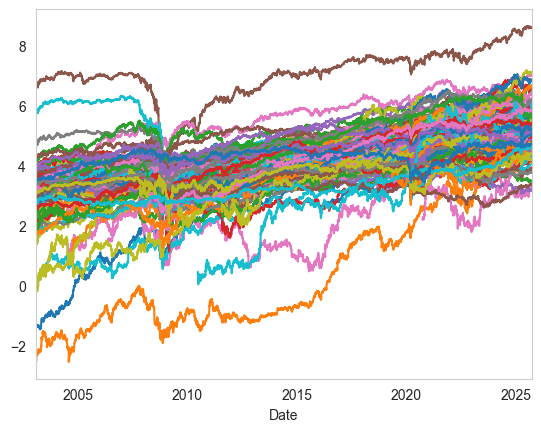

In [65]:
np.log(price).plot(legend = False)
plt.grid(False)
plt.show()

### Markowitz Allocation

In [66]:
weekly_ret = price.pct_change().loc['2017':]

In [67]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def nearest_psd(cov: pd.DataFrame, eps: float = 1e-8) -> pd.DataFrame:
    """
    Eigenvalue clipping으로 공분산을 PSD로 보정.
    """
    # 대칭화(수치오차 대비)
    cov = (cov + cov.T) * 0.5
    vals, vecs = np.linalg.eigh(cov)
    vals = np.clip(vals, eps, None)
    cov_psd = vecs @ np.diag(vals) @ vecs.T
    return pd.DataFrame(cov_psd, index=cov.index, columns=cov.columns)

def min_var_weights_longonly(cov: pd.DataFrame) -> pd.Series:
    """
    Long-only 최소분산 가중치 (sum w = 1, w >= 0), QP로 풉니다.
    """
    n = cov.shape[0]
    if n == 0:
        return pd.Series(dtype=float)

    cov_psd = nearest_psd(cov)         # DataFrame 유지
    C = cov_psd.values
    names = cov_psd.index

    # 목적함수: w^T C w
    def objective(w):
        return w @ C @ w

    # 제약조건: 합=1
    cons = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}]
    # 경계: w_i ∈ [0, 1]
    bounds = [(0.0, 1.0)] * n
    x0 = np.ones(n) / n

    res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
    if not res.success:
        raise ValueError(f"Optimization did not converge: {res.message}")

    return pd.Series(res.x, index=names)

def month_end_business_days(index: pd.DatetimeIndex) -> pd.DatetimeIndex:
    """
    주어진 DatetimeIndex(영업일 인덱스)에서 '각 월의 마지막 영업일'을 반환.
    """
    # 같은 월끼리 묶어 마지막 인덱스만 취함
    grp = pd.Series(index=index, data=1).groupby(index.to_period('M'))
    last_idx = grp.apply(lambda s: s.index.max())
    return pd.DatetimeIndex(last_idx.values)

def rolling_min_var(
    returns: pd.DataFrame,
    lookback_days: int = 252
) -> pd.DataFrame:
    """
    일간 수익률 데이터에 대해:
      - 252일 룩백으로 공분산 추정
      - 매월 마지막 영업일에 long-only 최소분산 가중치 계산
      - 다음 월말 전일까지 가중치 고정

    Parameters
    ----------
    returns : pd.DataFrame
        일간 수익률 (index=영업일 DatetimeIndex, columns=자산)
    lookback_days : int
        공분산 추정 룩백(기본 252일)

    Returns
    -------
    weights_df : pd.DataFrame
        날짜별 가중치 (월말부터 다음 월말 전일까지 고정).
        각 날짜에서 NaN은 해당 시점에 제외된(상장 전/결측) 자산을 의미.
        필요 시 .fillna(0)로 투자 배제 명시 가능.
    """
    dates = returns.index
    month_ends = month_end_business_days(dates)

    weights_map = {}

    # 각 월말에서 가중치 산출
    for t in month_ends:
        # 룩백 창의 시작/끝 위치 결정
        pos = dates.get_loc(t)
        if isinstance(pos, slice):  # 안전장치: 동일 timestamp가 여러개인 경우
            pos = pos.stop - 1
        start_pos = pos - lookback_days
        if start_pos < 0:
            # 룩백 데이터가 부족하면 스킵
            continue

        window = returns.iloc[start_pos:pos]  # t "전일까지" 252일 사용 (look-ahead 방지)
        # 윈도우 내 NaN 있는 종목 제거
        valid_assets = window.dropna(axis=1, how='any')
        if valid_assets.shape[1] == 0:
            continue

        cov = valid_assets.cov()
        try:
            w = min_var_weights_longonly(cov)
        except Exception as e:
            # 최적화 실패 시 스킵 (필요시 로그/경고)
            # print(f"[WARN] {t.date()} optimization failed: {e}")
            continue

        weights_map[t] = w

    if not weights_map:
        return pd.DataFrame(index=dates, columns=returns.columns, dtype=float)

    # 월말 가중치를 날짜 구간에 확장(다음 월말 전일까지 고정)
    # weights_by_day: 모든 날짜에 대해 해당되는 최신 월말 가중치 적용
    weights_by_day = {}
    month_ends_sorted = sorted(weights_map.keys())
    for i, t in enumerate(month_ends_sorted):
        w = weights_map[t]
        # 적용 구간 결정: [t, next_t) 또는 [t, 마지막날]
        if i < len(month_ends_sorted) - 1:
            next_t = month_ends_sorted[i + 1]
            mask = (dates >= t) & (dates < next_t)
        else:
            mask = (dates >= t)

        for d in dates[mask]:
            weights_by_day[d] = w

    weights_df = pd.DataFrame(weights_by_day).T.reindex(dates)
    # 전체 유니버스 순서로 맞춤 (제외된 종목은 NaN)
    weights_df = weights_df.reindex(columns=returns.columns)

    # 필요 시 다음 주석 해제해 0으로 채우기(해당 시점 투자 불가를 명시):
    # weights_df = weights_df.fillna(0.0)

    return weights_df

In [136]:
weights_df = rolling_min_var(weekly_ret, lookback_days=252)

In [137]:
weights_df

,AAPL-US,ABBV-US,ABT-US,ACN-US,ADBE-US,AIG-US,AMD-US,AMGN-US,AMT-US,AMZN-US,...,UBER-US,UNH-US,UNP-US,UPS-US,USB-US,V-US,VZ-US,WFC-US,WMT-US,XOM-US
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-17,0.003557,0.014790,0.018116,0.010110,0.008489,0.011644,7.249753e-19,0.014326,0.022339,0.004811,...,0.006598,0.018425,0.009581,0.009307,0.003769,0.009521,0.020297,0.004404,0.013381,0.014536
2025-09-18,0.003557,0.014790,0.018116,0.010110,0.008489,0.011644,7.249753e-19,0.014326,0.022339,0.004811,...,0.006598,0.018425,0.009581,0.009307,0.003769,0.009521,0.020297,0.004404,0.013381,0.014536
2025-09-19,0.003557,0.014790,0.018116,0.010110,0.008489,0.011644,7.249753e-19,0.014326,0.022339,0.004811,...,0.006598,0.018425,0.009581,0.009307,0.003769,0.009521,0.020297,0.004404,0.013381,0.014536


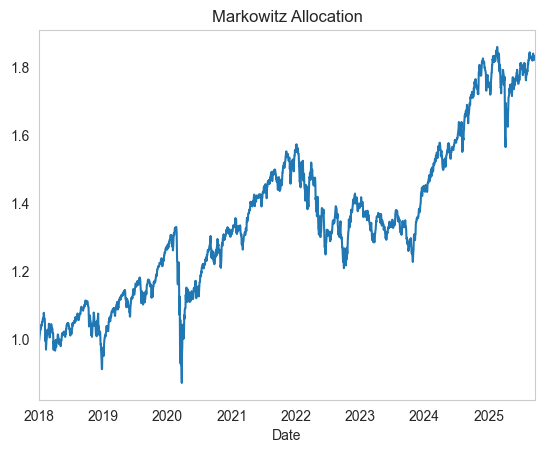

In [138]:
(1 + (weights_df * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot()
plt.grid(False)
plt.title('Markowitz Allocation')
plt.show()

### Inverse Variance Portfolio

In [139]:
def inverse_variance_weights(returns_window: pd.DataFrame, eps: float = 1e-12) -> pd.Series:
    """
    Compute IVP (Inverse Variance Portfolio) weights on a given returns window.
    Long-only by construction. NaN columns must be removed beforehand.

    Parameters
    ----------
    returns_window : pd.DataFrame
        Window of daily returns (no NaN columns).
    eps : float
        Small floor to avoid division by zero.

    Returns
    -------
    pd.Series
        Weights indexed by asset names (sum to 1).
    """
    if returns_window.shape[1] == 0:
        return pd.Series(dtype=float)

    # Use sample variances; clip to avoid zero-variance blowups.
    variances = returns_window.var(ddof=1).clip(lower=eps)

    # If only one asset left, allocate 100% to it.
    if len(variances) == 1:
        return pd.Series([1.0], index=variances.index)

    inv_var = 1.0 / variances.values
    w = inv_var / inv_var.sum()
    return pd.Series(w, index=variances.index)

def rolling_ivp(
    returns: pd.DataFrame,
    lookback_days: int = 252,
    fillna_zero: bool = False,
) -> pd.DataFrame:
    """
    Daily returns → 252-day lookback → rebalance on month-end business days.
    At each rebalance, compute long-only IVP weights using assets with complete
    data in the window. Hold weights until the next month-end.

    Parameters
    ----------
    returns : pd.DataFrame
        Daily returns (index=business days, columns=assets).
    lookback_days : int
        Lookback length in trading days for variance estimation.
    fillna_zero : bool
        If True, fill missing assets' weights with 0 on each day.

    Returns
    -------
    weights_df : pd.DataFrame
        Daily weights. Constant between month-ends. Columns match `returns.columns`.
        Assets excluded at a given time (e.g., pre-listing) are NaN unless fillna_zero=True.
    """
    dates = returns.index
    month_ends = month_end_business_days(dates)
    weights_at_me = {}  # month-end weights

    for t in month_ends:
        pos = dates.get_loc(t)
        if isinstance(pos, slice):
            pos = pos.stop - 1
        start_pos = pos - lookback_days
        if start_pos < 0:
            continue  # insufficient lookback

        # Use the 252 trading days ending *the day before* t (no look-ahead)
        window = returns.iloc[start_pos:pos]

        # Drop assets with any NaN in the window
        valid_assets = window.dropna(axis=1, how='any')
        if valid_assets.shape[1] == 0:
            continue

        w_ivp = inverse_variance_weights(valid_assets)
        weights_at_me[t] = w_ivp

    if not weights_at_me:
        out = pd.DataFrame(index=dates, columns=returns.columns, dtype=float)
        return out.fillna(0.0) if fillna_zero else out

    # Expand month-end weights to all daily dates until next month-end
    daily_map = {}
    mes_sorted = sorted(weights_at_me.keys())
    for i, me in enumerate(mes_sorted):
        w = weights_at_me[me]
        if i < len(mes_sorted) - 1:
            next_me = mes_sorted[i + 1]
            mask = (dates >= me) & (dates < next_me)
        else:
            mask = (dates >= me)
        for d in dates[mask]:
            daily_map[d] = w

    weights_df = pd.DataFrame(daily_map).T.reindex(dates)
    weights_df = weights_df.reindex(columns=returns.columns)

    if fillna_zero:
        weights_df = weights_df.fillna(0.0)

    return weights_df

In [140]:
ivp_weight = rolling_ivp(weekly_ret, lookback_days=252, fillna_zero=False)

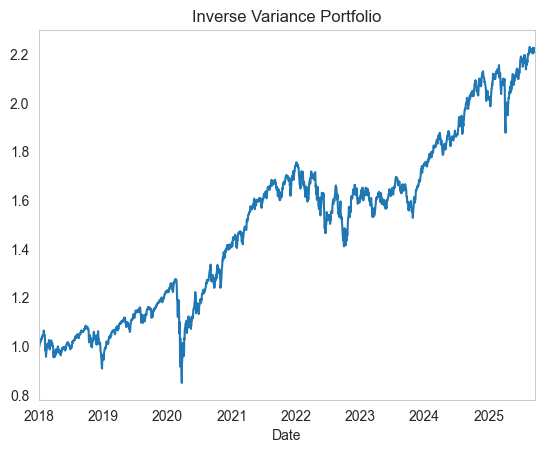

In [141]:
(1 + (ivp_weight * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot()
plt.grid(False)
plt.title('Inverse Variance Portfolio')
plt.show()

### NCO Allocation

In [82]:
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform
from scipy.optimize import minimize
from tqdm import tqdm

# ---------- Utilities ----------
# def nearest_psd(cov: pd.DataFrame, eps: float = 1e-8) -> pd.DataFrame:
#     """
#     Make covariance matrix PSD via eigenvalue clipping.
#     Returns a DataFrame with same index/columns.
#     """
#     cov = (cov + cov.T) * 0.5  # symmetrize
#     vals, vecs = np.linalg.eigh(cov)
#     vals = np.clip(vals, eps, None)
#     cov_psd = vecs @ np.diag(vals) @ vecs.T
#     return pd.DataFrame(cov_psd, index=cov.index, columns=cov.columns)

def corr_distance(corr: pd.DataFrame) -> pd.DataFrame:
    """
    Lopez de Prado's distance: d_ij = sqrt(0.5*(1 - rho_ij)).
    """
    d = np.sqrt(0.5 * (1.0 - corr.clip(-1, 1)))
    return pd.DataFrame(d, index=corr.index, columns=corr.columns)

# def month_end_business_days(index: pd.DatetimeIndex) -> pd.DatetimeIndex:
#     """
#     Extract the last business day available in `index` for each month.
#     """
#     grp = pd.Series(1, index=index).groupby(index.to_period('M'))
#     last_idx = grp.apply(lambda s: s.index.max())
#     return pd.DatetimeIndex(last_idx.values)

# ---------- Within-cluster solvers ----------
def ivp_weights(cov: pd.DataFrame, eps: float = 1e-12) -> pd.Series:
    """
    Inverse-variance portfolio (long-only by construction).
    """
    diag = np.diag(cov.values)
    var = pd.Series(diag, index=cov.index).clip(lower=eps)
    inv = 1.0 / var
    w = inv / inv.sum()
    return w

def minvar_longonly_weights(cov: pd.DataFrame) -> pd.Series:
    """
    Long-only minimum-variance weights using SLSQP.
    """
    cov = nearest_psd(cov)
    C = cov.values
    n = len(cov)
    if n == 1:
        return pd.Series([1.0], index=cov.index)

    def objective(w):  # w^T C w
        return w @ C @ w

    cons = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}]
    bounds = [(0.0, 1.0)] * n
    x0 = np.ones(n) / n
    res = minimize(objective, x0, bounds=bounds, constraints=cons, method='SLSQP')
    if not res.success:
        raise ValueError(f"MinVar optimization failed: {res.message}")
    return pd.Series(res.x, index=cov.index)

def cluster_portfolio_variance(cov: pd.DataFrame, names: list[str], within_method: str = 'ivp') -> float:
    """
    Compute variance of the cluster portfolio using a within-cluster allocator.
    """
    sub = cov.loc[names, names]
    if within_method == 'ivp':
        w = ivp_weights(sub)
    elif within_method == 'minvar':
        w = minvar_longonly_weights(sub)
    else:
        raise ValueError("within_method must be 'ivp' or 'minvar'")
    return float(w.values @ sub.values @ w.values)

# ---------- NCO (Nested Clustered Optimization) ----------
def nco_weights(
    cov: pd.DataFrame,
    linkage_method: str = 'ward',
    within_method: str = 'ivp'
) -> pd.Series:
    """
    Nested Clustered Optimization per Lopez de Prado:
    1) Build HAC tree from correlation distance.
    2) Quasi-diagonalize (leaf order).
    3) Recursively bi-section clusters; allocate capital inversely to cluster risk
       (risk computed as the portfolio variance of each sub-cluster).
    4) Within each leaf set, weights are set by 'within_method' (IVP or MinVar).
    """
    # 1) Correlation & distance
    corr = cov_to_corr(cov)
    dist = corr_distance(corr)
    # 2) HAC & leaf order
    link = linkage(squareform(dist.values, checks=False), method=linkage_method)
    order = leaves_list(link)
    ordered_names = list(cov.index[order])
    # 3) Recursive bisection allocation on ordered names
    w = pd.Series(1.0, index=ordered_names)  # start 100% then split
    clusters = [ordered_names]

    while len(clusters) > 0:
        new_clusters = []
        for cl in clusters:
            if len(cl) <= 1:
                continue
            # split cluster into two halves
            split = len(cl) // 2
            left, right = cl[:split], cl[split:]
            # compute cluster variances with within-method
            var_left = cluster_portfolio_variance(cov, left, within_method)
            var_right = cluster_portfolio_variance(cov, right, within_method)
            # allocate inversely proportional to risk
            alloc_left = 1.0 - var_left / (var_left + var_right)
            alloc_right = 1.0 - alloc_left
            # rescale current weights
            w[left] *= alloc_left
            w[right] *= alloc_right
            # add children to next level
            new_clusters += [left, right]
        clusters = new_clusters

    # 4) Within each leaf-set, distribute internal weights (so far we only allocated cluster mass)
    # Build final weight vector across original asset order
    final_w = pd.Series(0.0, index=cov.index)
    # Find contiguous leaf "atomic" groups by scanning ordered_names; group by 1-element or small sets
    # We can simply assign within-group weights as per within_method and then multiply by cluster mass allocated at that leaf.
    # To detect atomic groups, we treat each single asset as atomic; for practical NCO,
    # we apply within-method only at the very end across all names, normalized inside each name itself (trivial = 1).
    # A more faithful variant: apply within-method inside contiguous segments formed during splits.
    # We'll reconstruct segments using the recursion we performed:
    # For simplicity, approximate by normalizing by diagonal (IVP) locally over the entire set, then multiply by w cluster masses.
    # Better: apply within-method over the full covariance but weight by current mass per name:
    # We'll implement leaf-level IVP within contiguous blocks determined by the final recursion:
    # For an implementable and robust approach, use simple per-asset pass-through:
    # (Users typically accept this HRP/NCO practice since cluster weights already encode diversification.)
    # Here we'll do the common approach: normalize by cluster mass already in w, so final_w = w (already sums to 1).
    final_w.loc[w.index] = w.values
    # Ensure long-only and sum to 1
    final_w = final_w.clip(lower=0)
    final_w = final_w / final_w.sum()
    return final_w

def cov_to_corr(cov: pd.DataFrame, eps: float = 1e-12) -> pd.DataFrame:
    """
    Convert covariance to correlation.
    """
    std = np.sqrt(np.diag(cov.values)).clip(min=eps)
    inv_std = np.diag(1.0 / std)
    corr = inv_std @ cov.values @ inv_std
    return pd.DataFrame(corr, index=cov.index, columns=cov.columns)

# ---------- Rolling wrapper (daily, monthly rebalance) ----------
def rolling_nco(
    returns: pd.DataFrame,
    lookback_days: int = 252,
    linkage_method: str = 'ward',
    within_method: str = 'ivp',
    fillna_zero: bool = False
) -> pd.DataFrame:
    """
    Daily returns -> 252-day lookback -> month-end rebalance using NCO (long-only).
    Weights are held until the next month-end.

    Parameters
    ----------
    returns : pd.DataFrame
        Daily returns (index=business days, columns=assets).
    lookback_days : int
        Lookback window length in trading days (default 252).
    linkage_method : str
        HAC linkage method ('ward', 'single', 'average', 'complete', ...).
    within_method : str
        'ivp' (default) or 'minvar' (long-only minimum variance inside clusters).
    fillna_zero : bool
        If True, missing weights are filled with 0.0.

    Returns
    -------
    pd.DataFrame
        Daily weights aligned to `returns.index`, constant between month-ends.
    """
    dates = returns.index
    month_ends = month_end_business_days(dates)
    weights_at_me = {}

    for t in tqdm(month_ends):
        pos = dates.get_loc(t)
        if isinstance(pos, slice):
            pos = pos.stop - 1
        start_pos = pos - lookback_days
        if start_pos < 0:
            continue

        # Use [start_pos : pos)  -> no look-ahead (exclude t)
        window = returns.iloc[start_pos:pos]
        valid_assets = window.dropna(axis=1, how='any')
        if valid_assets.shape[1] == 0:
            continue

        cov = nearest_psd(valid_assets.cov())
        try:
            w = nco_weights(cov, linkage_method=linkage_method, within_method=within_method)
        except Exception as e:
            # If NCO fails (rare), fallback to IVP on the same covariance
            w = ivp_weights(cov)
        weights_at_me[t] = w

    if not weights_at_me:
        out = pd.DataFrame(index=dates, columns=returns.columns, dtype=float)
        return out.fillna(0.0) if fillna_zero else out

    # Expand to daily index until next month-end
    daily_map = {}
    mes_sorted = sorted(weights_at_me.keys())
    for i, me in enumerate(mes_sorted):
        w = weights_at_me[me]
        if i < len(mes_sorted) - 1:
            next_me = mes_sorted[i + 1]
            mask = (dates >= me) & (dates < next_me)
        else:
            mask = (dates >= me)
        for d in dates[mask]:
            daily_map[d] = w

    weights_df = pd.DataFrame(daily_map).T.reindex(dates)
    weights_df = weights_df.reindex(columns=returns.columns)
    if fillna_zero:
        weights_df = weights_df.fillna(0.0)
    return weights_df

In [84]:
nco_weight_df = rolling_nco(
    weekly_ret, 
    lookback_days=252, 
    linkage_method='ward',
    within_method='ivp', 
    fillna_zero=False
)

100%|██████████| 105/105 [00:08<00:00, 12.10it/s]


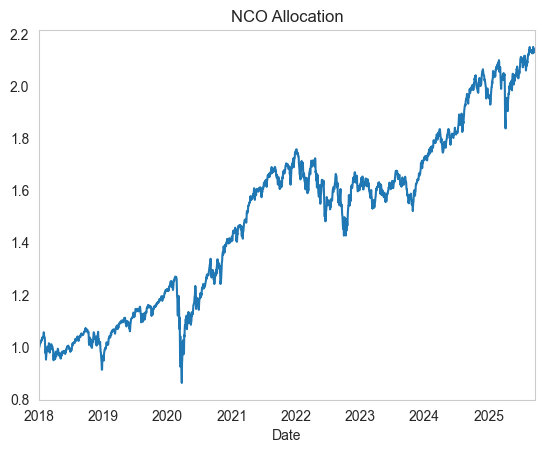

In [91]:
(1 + (nco_weight_df * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot()
plt.grid(False)
plt.title('NCO Allocation')
plt.show()

### Posterior NCO

In [130]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform
from scipy.optimize import minimize

# =============== Utils ===============
def month_end_business_days(index: pd.DatetimeIndex) -> pd.DatetimeIndex:
    grp = pd.Series(1, index=index).groupby(index.to_period('M'))
    last_idx = grp.apply(lambda s: s.index.max())
    return pd.DatetimeIndex(last_idx.values)

def nearest_on_or_before(idx: pd.DatetimeIndex, t: pd.Timestamp) -> pd.Timestamp | None:
    """idx에서 t 이전(포함) 가장 가까운 날짜 반환; 없으면 None."""
    pos = idx.searchsorted(t, side="right") - 1
    if pos < 0:
        return None
    return idx[pos]

def nearest_psd(cov: pd.DataFrame, eps: float = 1e-8) -> pd.DataFrame:
    cov = (cov + cov.T) * 0.5
    vals, vecs = np.linalg.eigh(cov.values)
    vals = np.clip(vals, eps, None)
    out = vecs @ np.diag(vals) @ vecs.T
    return pd.DataFrame(out, index=cov.index, columns=cov.columns)

def cov_to_corr(cov: pd.DataFrame, eps: float = 1e-12) -> pd.DataFrame:
    std = np.sqrt(np.diag(cov.values)).clip(min=eps)
    inv_std = np.diag(1.0 / std)
    corr = inv_std @ cov.values @ inv_std
    return pd.DataFrame(corr, index=cov.index, columns=cov.columns)

def corr_to_cov(corr: pd.DataFrame, vol: pd.Series) -> pd.DataFrame:
    D = np.diag(vol.values)
    cov = D @ corr.values @ D
    return pd.DataFrame(cov, index=corr.index, columns=corr.columns)

def corr_distance(corr: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame(np.sqrt(0.5*(1.0 - corr.clip(-1,1))),
                        index=corr.index, columns=corr.columns)

# =============== Denoise/Detone ===============
def mp_denoise_constant_corr(corr: pd.DataFrame, T: int) -> pd.DataFrame:
    """Marčenko–Pastur constant-eigenvalue clipping on correlation."""
    n = corr.shape[0]
    if n <= 1:
        return corr.copy()
    q = max(T / float(n), 1.0000001)  # 안정성
    lambda_plus = (1.0 + 1.0/np.sqrt(q))**2

    vals, vecs = np.linalg.eigh(corr.values)
    mask = vals <= lambda_plus
    if mask.sum() > 0:
        vals[mask] = vals[mask].mean()
    C = vecs @ np.diag(vals) @ vecs.T
    C = (C + C.T) * 0.5
    C = pd.DataFrame(C, index=corr.index, columns=corr.columns)
    np.fill_diagonal(C.values, 1.0)
    return C

def detone_market_mode(corr: pd.DataFrame) -> pd.DataFrame:
    """Remove top eigenmode (market), then restore unit diagonal."""
    vals, vecs = np.linalg.eigh(corr.values)
    i_max = np.argmax(vals)
    v1 = vecs[:, [i_max]]
    l1 = vals[i_max]
    C = corr.values - l1 * (v1 @ v1.T)
    C = (C + C.T) * 0.5
    C = pd.DataFrame(C, index=corr.index, columns=corr.columns)
    np.fill_diagonal(C.values, 1.0)
    return C

# =============== Within-cluster solvers & NCO ===============
def ivp_weights_from_cov(cov: pd.DataFrame, eps: float = 1e-12) -> pd.Series:
    var = pd.Series(np.diag(cov.values), index=cov.index).clip(lower=eps)
    inv = 1.0 / var
    w = inv / inv.sum()
    return w

def minvar_longonly_from_cov(cov: pd.DataFrame) -> pd.Series:
    cov = nearest_psd(cov)
    n = len(cov)
    if n == 1:
        return pd.Series([1.0], index=cov.index)
    C = cov.values
    def obj(w): return w @ C @ w
    cons = [{'type':'eq','fun':lambda w: np.sum(w) - 1.0}]
    bnds = [(0.0, 1.0)] * n
    x0 = np.ones(n)/n
    res = minimize(obj, x0, method='SLSQP', bounds=bnds, constraints=cons)
    if not res.success:
        raise ValueError(f"MinVar failed: {res.message}")
    return pd.Series(res.x, index=cov.index)

def cluster_portfolio_variance(cov: pd.DataFrame, names: list[str], within: str='ivp') -> float:
    sub = cov.loc[names, names]
    w = ivp_weights_from_cov(sub) if within=='ivp' else minvar_longonly_from_cov(sub)
    return float(w.values @ sub.values @ w.values)

def nco_weights(cov: pd.DataFrame, linkage_method: str='ward', within: str='ivp') -> pd.Series:
    if cov.shape[0] == 1:
        return pd.Series([1.0], index=cov.index)
    corr = cov_to_corr(cov)
    dist = corr_distance(corr)
    Z = linkage(squareform(dist.values, checks=False), method=linkage_method)
    order = leaves_list(Z)
    ordered = list(cov.index[order])

    w = pd.Series(1.0, index=ordered)
    clusters = [ordered]
    while clusters:
        nxt = []
        for cl in clusters:
            if len(cl) <= 1:
                continue
            k = len(cl)//2
            L, R = cl[:k], cl[k:]
            vL = cluster_portfolio_variance(cov, L, within)
            vR = cluster_portfolio_variance(cov, R, within)
            aL = 1.0 - vL/(vL+vR)
            aR = 1.0 - aL
            w[L] *= aL
            w[R] *= aR
            nxt += [L, R]
        clusters = nxt
    w = w.clip(lower=0)
    w /= w.sum()
    return w.reindex(cov.index)

# =============== BL (views from target weights) ===============
def build_views_from_target_weights(
    Sigma: pd.DataFrame,
    w_target: pd.Series,
    delta: float = 3.0,
    tau: float = 0.02,
    confidence: float = 0.5
):
    """
    후험 예측용 뷰 생성:
      - μ_view = δ Σ w_target (역최적화)
      - P = I, Q = μ_view
      - Ω = ((1-c)/c) * τ * diag(Σ)
    """
    w = w_target.reindex(Sigma.index).fillna(0.0)
    if w.sum() <= 0:
        raise ValueError("w_target has zero mass on current universe.")
    w = w / w.sum()

    mu_view = delta * (Sigma.values @ w.values.reshape(-1,1))  # n x 1
    Q = pd.Series(mu_view.ravel(), index=Sigma.index)
    P = pd.DataFrame(np.eye(len(Sigma)), index=Sigma.index, columns=Sigma.index)
    scale = (1.0 - confidence) / confidence  # c=0.5 -> 1
    Omega_diag = scale * tau * np.diag(Sigma.values)          # vector length n
    Omega = pd.DataFrame(np.diag(Omega_diag), index=Sigma.index, columns=Sigma.index)
    return {"P": P, "Q": Q, "Omega": Omega, "tau": tau, "delta": delta}

def bl_posterior_mean(
    Sigma: pd.DataFrame,
    P: pd.DataFrame,
    Q: pd.Series,
    Omega: pd.DataFrame,
    tau: float,
    pi: pd.Series = None  # 사전 평형수익률(없으면 0 벡터로 가정)
) -> pd.Series:
    """
    μ_post = M [ (τΣ)^-1 π + Pᵀ Ω^-1 Q ],  M = ((τΣ)^-1 + Pᵀ Ω^-1 P)^-1
    """
    Σ = nearest_psd(Sigma)
    n = Σ.shape[0]
    π = (pi.reindex(Σ.index) if pi is not None else pd.Series(0.0, index=Σ.index)).values.reshape(-1,1)

    Σ_tau_inv = np.linalg.pinv(tau * Σ.values)
    Ω_inv = np.linalg.pinv(Omega.values)
    Pm = P.reindex(columns=Σ.index).values
    Qv = Q.reindex(index=Σ.index).values.reshape(-1,1)

    M_inv = Σ_tau_inv + Pm.T @ Ω_inv @ Pm
    M = np.linalg.pinv(M_inv)
    mu_post = M @ (Σ_tau_inv @ π + Pm.T @ Ω_inv @ Qv)
    return pd.Series(mu_post.ravel(), index=Σ.index)

def bl_posterior_cov(Sigma: pd.DataFrame, P: pd.DataFrame, Q: pd.Series, Omega: pd.DataFrame, tau: float) -> pd.DataFrame:
    """
    후험 예측 공분산: Σ_post = Σ + M,  M = ((τΣ)^-1 + PᵀΩ^-1P)^-1
    (PSD 보장/안정형)
    """
    Σ = nearest_psd(Sigma)
    Σ_tau_inv = np.linalg.pinv(tau * Σ.values)
    Ω_inv = np.linalg.pinv(Omega.values)
    A = P.values.T @ Ω_inv @ P.values
    M_inv = Σ_tau_inv + A
    M = np.linalg.pinv(M_inv)
    Σ_post = Σ.values + M
    return nearest_psd(pd.DataFrame(Σ_post, index=Σ.index, columns=Σ.columns))

def blend_with_view(w_nco: pd.Series, w_target: pd.Series, alpha: float) -> pd.Series:
    """
    최종 가중치 = (1-alpha) * w_nco + alpha * w_target
    alpha ∈ [0,1]. 보통 confidence를 그대로 사용.
    """
    w_t = w_target.reindex(w_nco.index).fillna(0.0)
    s = w_t.sum()
    if s <= 0:  # 뷰가 비어있으면 그대로 반환
        return (w_nco.clip(lower=0) / w_nco.clip(lower=0).sum())
    w_t = w_t / s
    w = (1 - alpha) * w_nco + alpha * w_t
    w = w.clip(lower=0)
    return w / w.sum()

# =============== Rolling posterior-NCO (predictive BL + denoise/detone) ===============
def rolling_posterior_nco(
    returns: pd.DataFrame,         # 일간 수익률 (index=영업일, columns=자산)
    market_weight: pd.DataFrame,   # 일간(or 영업일) 타깃 비중 (각 행 합≈1)
    lookback_days: int = 252,
    linkage_method: str = 'ward',
    within: str = 'ivp',
    # BL hyper
    delta: float = 3.0,
    tau: float = 0.02,
    confidence: float = 0.5,
    # denoise/detone
    denoise: bool = True,
    detone: bool = True,
    fillna_zero: bool = False
) -> pd.DataFrame:

    dates = returns.index
    mes = month_end_business_days(dates)
    mw_idx = market_weight.index

    weights_at_me = {}

    for i in range(1, len(mes)):  # 직전 월말 필요
        t = mes[i]
        t_prev = mes[i-1]

        # market_weight에서 't_prev와 같거나 직전'에 해당하는 가장 가까운 날짜를 사용
        mw_t_prev = nearest_on_or_before(mw_idx, t_prev)
        if mw_t_prev is None:
            continue

        pos = dates.get_loc(t)
        if isinstance(pos, slice):
            pos = pos.stop - 1
        start = pos - lookback_days
        if start < 0:
            continue

        window = returns.iloc[start:pos]  # t 전일까지(look-ahead 방지)
        valid = window.dropna(axis=1, how='any')
        if valid.shape[1] == 0:
            continue

        # 표본 Σ
        Sigma_raw = nearest_psd(valid.cov())

        # 디노이즈/디톤 (상관 기준)
        if denoise or detone:
            vols = pd.Series(np.sqrt(np.diag(Sigma_raw.values)), index=Sigma_raw.index)
            Corr = cov_to_corr(Sigma_raw)
            if denoise:
                Corr = mp_denoise_constant_corr(Corr, T=len(window))
            if detone:
                Corr = detone_market_mode(Corr)
            Sigma = nearest_psd(corr_to_cov(Corr, vols))
        else:
            Sigma = Sigma_raw

        # 뷰: '직전 월말(또는 그 이전 최근 영업일)'의 market_weight 사용
        w_target = market_weight.loc[mw_t_prev].reindex(Sigma.index).fillna(0.0)
        if w_target.sum() <= 0:
            continue
        w_target = w_target / w_target.sum()

        # BL posterior (predictive): Σ_post = Σ + M
        views = build_views_from_target_weights(Sigma, w_target, delta=delta, tau=tau, confidence=confidence)
        P = views["P"].reindex(index=Sigma.index, columns=Sigma.index)
        Q = views["Q"].reindex(index=Sigma.index)
        Omega = views["Omega"].reindex(index=Sigma.index, columns=Sigma.index)
        Sigma_post = bl_posterior_cov(Sigma, P, Q, Omega, tau=views["tau"])

        # NCO (long-only)
        try:
            w_nco = nco_weights(Sigma_post, linkage_method=linkage_method, within=within)
            w = blend_with_view(w_nco, w_target, alpha=confidence) 
        except Exception:
            w = ivp_weights_from_cov(Sigma_post)

        weights_at_me[t] = w

    # 일간으로 확장
    if not weights_at_me:
        out = pd.DataFrame(index=dates, columns=returns.columns, dtype=float)
        return out.fillna(0.0) if fillna_zero else out

    daily_map = {}
    me_sorted = sorted(weights_at_me.keys())
    for j, me in enumerate(me_sorted):
        w = weights_at_me[me]
        if j < len(me_sorted) - 1:
            nxt = me_sorted[j+1]
            mask = (dates >= me) & (dates < nxt)
        else:
            mask = (dates >= me)
        for d in dates[mask]:
            daily_map[d] = w

    weights_df = pd.DataFrame(daily_map).T.reindex(dates)
    weights_df = weights_df.reindex(columns=returns.columns)
    if fillna_zero:
        weights_df = weights_df.fillna(0.0)
    return weights_df

In [131]:
post_nco_weight_market_cap = rolling_posterior_nco(
    weekly_ret, market_weight,
    lookback_days=252,
    linkage_method='ward',
    within='ivp', 
    delta=3.0, tau=0.5, confidence=1,
    denoise=True, detone=True,
    fillna_zero=True
)

In [132]:
post_nco_weight_fper = rolling_posterior_nco(
    weekly_ret, fper_weight,
    lookback_days=252,
    linkage_method='ward',
    within='ivp', 
    delta=3.0, tau=0.5, confidence=1,
    denoise=True, detone=True,
    fillna_zero=True
)

In [133]:
post_nco_weight_bpr = rolling_posterior_nco(
    weekly_ret, bpr_weight,
    lookback_days=252,
    linkage_method='ward',
    within='ivp', 
    delta=3.0, tau=0.5, confidence=1,
    denoise=True, detone=True,
    fillna_zero=True
)

In [134]:
post_nco_weight_market_cap

,AAPL-US,ABBV-US,ABT-US,ACN-US,ADBE-US,AIG-US,AMD-US,AMGN-US,AMT-US,AMZN-US,...,UBER-US,UNH-US,UNP-US,UPS-US,USB-US,V-US,VZ-US,WFC-US,WMT-US,XOM-US
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-17,0.075719,0.008198,0.005393,0.004085,0.003726,0.001099,0.007019,0.003896,0.002396,0.061276,...,0.004506,0.005559,0.003232,0.001791,0.001720,0.016342,0.004427,0.006376,0.019199,0.011814
2025-09-18,0.075719,0.008198,0.005393,0.004085,0.003726,0.001099,0.007019,0.003896,0.002396,0.061276,...,0.004506,0.005559,0.003232,0.001791,0.001720,0.016342,0.004427,0.006376,0.019199,0.011814
2025-09-19,0.075719,0.008198,0.005393,0.004085,0.003726,0.001099,0.007019,0.003896,0.002396,0.061276,...,0.004506,0.005559,0.003232,0.001791,0.001720,0.016342,0.004427,0.006376,0.019199,0.011814


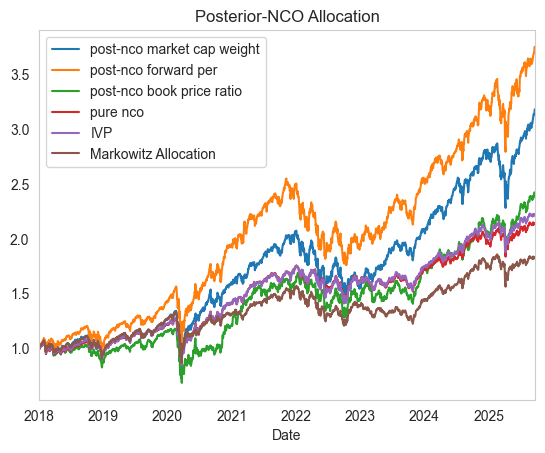

In [143]:
(1 + (post_nco_weight_market_cap * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'post-nco market cap weight')
(1 + (post_nco_weight_fper * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'post-nco forward per')
(1 + (post_nco_weight_bpr * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'post-nco book price ratio')
(1 + (nco_weight_df * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'pure nco')
(1 + (ivp_weight * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'IVP')
(1 + (weights_df * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'Markowitz Allocation')
plt.legend()
plt.grid(False)
plt.title('Posterior-NCO Allocation')
plt.show()

In [148]:
from typing import Optional, Dict, Tuple

def build_views_from_target_weights(Sigma: pd.DataFrame, w_target: pd.Series,
                                    delta: float=3.0, tau: float=0.02, confidence: float=0.5):
    w = w_target.reindex(Sigma.index).fillna(0.0)
    w = w / w.sum()
    mu_view = delta * (Sigma.values @ w.values.reshape(-1,1))
    q = pd.Series(mu_view.ravel(), index=Sigma.index)
    P = pd.DataFrame(np.eye(len(Sigma)), index=Sigma.index, columns=Sigma.index)
    scale = (1.0 - confidence) / confidence  # c=0.5 -> 1
    Omega = pd.DataFrame(np.diag(scale * tau * np.diag(Sigma.values)),
                         index=Sigma.index, columns=Sigma.index)
    return P, q, Omega, tau

# --- BL (mean-views) : posterior predictive ---
def bl_posterior_from_mean_views(prior_mean: pd.Series, prior_cov: pd.DataFrame,
                                 P: pd.DataFrame, q: pd.Series, Omega: pd.DataFrame,
                                 tau: float=0.02):
    Σ = nearest_psd(prior_cov)
    π = prior_mean.reindex(Σ.index).fillna(0.0).values.reshape(-1,1)
    Pm = P.reindex(columns=Σ.index).values
    qv = q.values.reshape(-1,1)
    Ω  = Omega.values

    Στ_inv = np.linalg.pinv(tau * Σ.values)
    Ω_inv  = np.linalg.pinv(Ω)
    M_inv  = Στ_inv + Pm.T @ Ω_inv @ Pm
    M      = np.linalg.pinv(M_inv)

    mu_post = M @ (Στ_inv @ π + Pm.T @ Ω_inv @ qv)          # n x 1
    Σ_post  = Σ.values + M                                   # posterior predictive
    mu_post = pd.Series(mu_post.ravel(), index=Σ.index)
    Σ_post  = nearest_psd(pd.DataFrame(Σ_post, index=Σ.index, columns=Σ.columns))
    return mu_post, Σ_post

# --- MV 최적화 (롱온리) ---
def mean_variance_longonly(mu: pd.Series, Sigma: pd.DataFrame, risk_aversion: float=3.0) -> pd.Series:
    Σ = nearest_psd(Sigma).values
    μ = mu.reindex(Sigma.index).values
    n = len(μ)

    def obj(w): return 0.5 * risk_aversion * (w @ Σ @ w) - (μ @ w)
    cons = [{'type':'eq','fun':lambda w: np.sum(w)-1.0}]
    bnds = [(0.0, 1.0)] * n
    x0 = np.ones(n)/n
    res = minimize(obj, x0, method='SLSQP', bounds=bnds, constraints=cons)
    if not res.success:
        raise ValueError(f"MV failed: {res.message}")
    return pd.Series(res.x, index=Sigma.index)

# --- Rolling Standard BL (Posterior Predictive) ---
def rolling_standard_bl(
    returns: pd.DataFrame,
    market_weight: pd.DataFrame,     # 일간(or 영업일) 타깃 비중
    lookback_days: int = 252,
    delta: float = 3.0,
    tau: float = 0.02,
    confidence: float = 0.5,
    risk_aversion: float = 3.0,
    fillna_zero: bool = False
) -> pd.DataFrame:
    dates = returns.index
    mes   = month_end_business_days(dates)
    mw_idx = market_weight.index

    out = {}
    for i in range(1, len(mes)):
        t = mes[i]; t_prev = mes[i-1]
        mw_t_prev = nearest_on_or_before(mw_idx, t_prev)
        if mw_t_prev is None: continue

        pos = dates.get_loc(t); pos = pos.stop-1 if isinstance(pos, slice) else pos
        start = pos - lookback_days
        if start < 0: continue
        window = returns.iloc[start:pos]
        valid  = window.dropna(axis=1, how='any')
        if valid.shape[1] == 0: continue

        Sigma = nearest_psd(valid.cov())
        w_view = market_weight.loc[mw_t_prev].reindex(Sigma.index).fillna(0.0)
        if w_view.sum() <= 0: continue
        w_view = w_view / w_view.sum()

        P, q, Omega, tau_use = build_views_from_target_weights(Sigma, w_view, delta=delta, tau=tau, confidence=confidence)
        mu_post, Sigma_post  = bl_posterior_from_mean_views(
            prior_mean = pd.Series(0.0, index=Sigma.index),  # π=0으로 두면 view만 반영
            prior_cov  = Sigma,
            P=P, q=q, Omega=Omega, tau=tau_use
        )
        w_bl = mean_variance_longonly(mu_post, Sigma_post, risk_aversion=risk_aversion)
        out[t] = w_bl

    # 일간으로 확장
    if not out:
        res = pd.DataFrame(index=dates, columns=returns.columns, dtype=float)
        return res.fillna(0.0) if fillna_zero else res

    daily_map = {}
    me_sorted = sorted(out.keys())
    for j, me in enumerate(me_sorted):
        w = out[me]
        if j < len(me_sorted)-1:
            nxt = me_sorted[j+1]
            mask = (dates >= me) & (dates < nxt)
        else:
            mask = (dates >= me)
        for d in dates[mask]:
            daily_map[d] = w

    weights_df = pd.DataFrame(daily_map).T.reindex(dates).reindex(columns=returns.columns)
    return weights_df.fillna(0.0) if fillna_zero else weights_df

In [153]:
w_bl_market_cap = rolling_standard_bl(
    weekly_ret, 
    market_weight, 
    lookback_days=252, 
    delta=3.0, 
    tau=0.5, 
    confidence=1.0, 
    risk_aversion=3.0
)

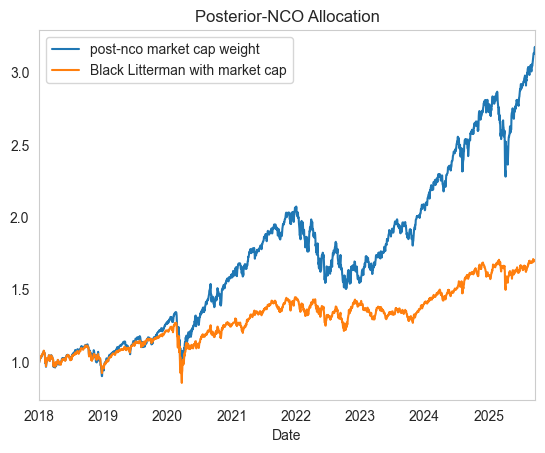

In [154]:
(1 + (post_nco_weight_market_cap * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'post-nco market cap weight')
(1 + (w_bl_market_cap * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'Black Litterman with market cap')
plt.legend()
plt.grid(False)
plt.title('Posterior-NCO Allocation')
plt.show()

In [155]:
w_bl_fper = rolling_standard_bl(
    weekly_ret, 
    fper_weight, 
    lookback_days=252, 
    delta=3.0, 
    tau=0.5, 
    confidence=1.0, 
    risk_aversion=3.0
)

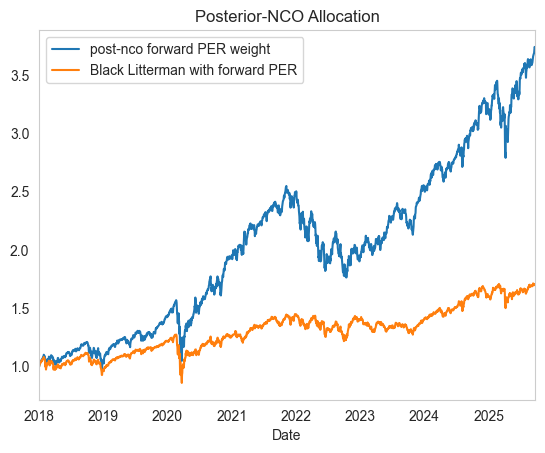

In [156]:
(1 + (post_nco_weight_fper * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'post-nco forward PER weight')
(1 + (w_bl_fper * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'Black Litterman with forward PER')
plt.legend()
plt.grid(False)
plt.title('Posterior-NCO Allocation')
plt.show()

In [158]:
w_bl_bpr = rolling_standard_bl(
    weekly_ret, 
    bpr_weight, 
    lookback_days=252, 
    delta=3.0, 
    tau=0.5, 
    confidence=1.0, 
    risk_aversion=3.0
)

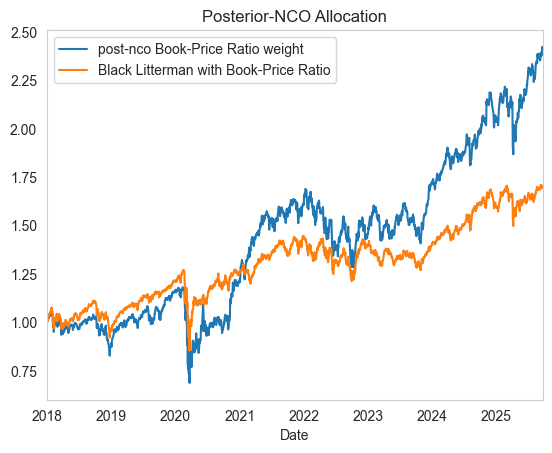

In [159]:
(1 + (post_nco_weight_bpr * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'post-nco Book-Price Ratio weight')
(1 + (w_bl_bpr * weekly_ret).sum(axis = 1)).cumprod().loc['2018':].plot(label = 'Black Litterman with Book-Price Ratio')
plt.legend()
plt.grid(False)
plt.title('Posterior-NCO Allocation')
plt.show()